<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/basic_probability/catalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lattice Paths

A _lattice path_ is a sequence of _lattice points_, which are simply coordinates with integer components. A common example of a lattice path combinatorics problem is to count the number of different ways a path can be drawn from the bottom left of a grid to the top right if the only allowed moves are up and right.  

## Analysis

Starting with point $(0, 0)$ and ending up at $(n, n)$ involves $n$ movements up and $n$ movements to the right. Using the multiplication rule:

\begin{align}
  |paths|
    = {2n \choose n} {n \choose n}
    & = {2n \choose n} \\
    & = \frac {(2n)!} {(n!)((2n - n)!} \\\\
    & = \frac {(2n)!} {(n!)^2}
\end{align}

Note that ${n \choose n} = 1$, and that whether we choose to move up or right first makes no difference.

## Diagonal Movement and the Catalan Numbers

Sometimes we want to count the number of paths that lie strictly above the diagonal of the grid on the way to $(n, n)$. This number corresponds to the $n$th _Catalan Number_, given by

\begin{equation}
  C_n = \frac {{2n \choose n}} {n + 1}
\end{equation}

The probability that a path lies above the diagonal depends on the _probability model_ we choose to approach the random experiment:

1. Symmetric - This reduces the problem to counting. Since every outcome is equally likely, we can use the formula above directly:

\begin{align}
  P(A)
    &= \frac {|A|} {|\Omega|} \\ \\
    &= \frac
      {\frac {{2n \choose n}} {n + 1}}
      {|\Omega|} \\\\
    &= \frac 1 {n + 1} & \Omega = {2n \choose n}
\end{align}

2. At each point, there is an equally likely chance (50%) of moving up or right, but when reaching either border, the path must continue along that border until reaching $(n, n)$.

Model 2 presents additional complications and no obvious way to count. Luckily mathematicians have developed a _recurrence relation_ for computing such a number:

\begin{equation}
  C_n = \frac {{2n-1 \choose n}} {2^{2n-1}}
\end{equation}

> TODO: Do derivation in AOPS to understand recurrence.


In [ ]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("LaTeXStrings")
Pkg.add("Combinatorics")

Model 1: 0.16666666666666666, Model 2: 0.24339


┌ Warning: Skipped line arg Upper Lattice Path.
└ @ Plots ~/.julia/packages/Plots/MR7sb/src/args.jl:1105
┌ Warning: Skipped line arg Non-Upper Lattice Path.
└ @ Plots ~/.julia/packages/Plots/MR7sb/src/args.jl:1105


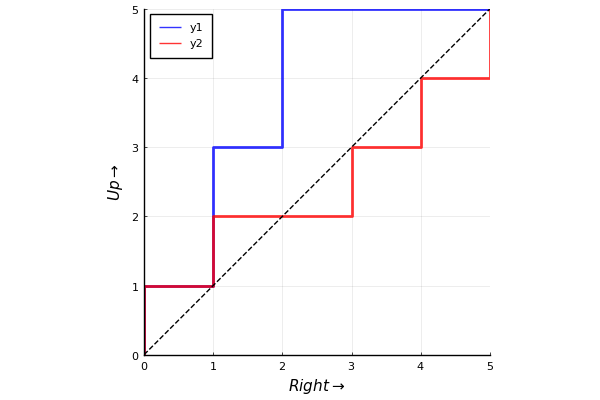

In [38]:
"""
Lattice Paths

This simulation uses a Monte Carlo simulation to approximate the probability of
a lattice path lying above the diagonal using both of the above models.
"""

using Random, Combinatorics, LaTeXStrings, Combinatorics, Plots; pyplot()

n, N = 5, 10^5

"""
liesAbove accepts a lattice path `v` and determines if each of its movements is
above the diagonal.
"""
function liesAbove(v)
  # TODO: Understand wtf this is doing
  for i in 1:Int(length(v) / 2)
    sum(v[1:2*i-1]) >= i ? continue : return false
  end

  return true
end

"""
rdmWalk computes a random walk of length `n`. The function outputs a vector of
1s and 0s corresponding to movements up and right, respectively. The result is a
representation of a lattice path from `(0, 0)` to `(n, n)`.
"""
function rdmWalk(n)
  x, y = 0, 0
  path = []

  # Reach one of the borders first
  while x < n && y < n
    move = rand(0:1)

    if move == 1
      y += 1
      push!(path, 1)
    else
      x += 1
      push!(path, 0)
    end
  end

  # Move along the border until reaching (n, n)
  append!(path, x < n ? zeros(Int64, n-x) : ones(Int64, n-y))

  return path
end

"""
plotPath produces a plot labeled with `l` with stroke `c` of the path described
by `v`.
"""
function plotPath(v, l, c)
  x, y = 0, 0

  # Reconstruct the path given the information in `v`
  xs, ys = [x], [y]

  for i in v
    if i == 0
      x += 1
    else
      y += 1
    end

    push!(xs, x), push!(ys, y)
  end

  plot!(xs, ys, l=l, c=c,
    la=0.8, lw=2,
    ratio=:equal, legend=:topleft,
    xlims=(0, n), ylims=(0, n),
    xlabel=L"Right \rightarrow",
    ylabel=L"Up \rightarrow")
end

# Compute sequences of 1s and 0s representing all paths
omega = unique(permutations([zeros(Int64, n) ; ones(Int64, n)]))

# The number of paths that lie above the diagonal
A = omega[liesAbove.(omega)]

model1 = length(A) / length(omega)
model2 = sum([liesAbove(rdmWalk(n)) for _ in 1:N]) / N

println("Model 1: $(model1), Model 2: $(model2)")

plot()
plotPath(rand(A), "Upper Lattice Path", :blue)
plotPath(rand(setdiff(omega, A)), "Non-Upper Lattice Path", :red)
plot!([0,n], [0,n], ls=:dash, c=:black, label="")